In [1]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use("bmh")
%matplotlib inline

In [2]:
n5_11 = pypsa.Network("capacity/elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c5-mdes+c11-mdes+e0.7.nc")

INFO:pypsa.io:Imported network elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c5-mdes+c11-mdes+e0.7.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


**Mismatch between supply and demand across 37 regions**, deploying MDES at the parameter combinations of energy capacity cost at 5 €/kWh, power capacity cost at 1100 €/kWh and round-trip efficiency at 70\%.

In [3]:
regional_d = n5_11.loads_t.p.sum().div(1e6)
regional_d.index = [idx.split(' ')[0] + ' ' + idx.split(' ')[1] for idx in regional_d.index]

In [4]:
regional_d.rename("Demand (TWh)", inplace=True)

AL1 0      2.235824
AT1 0     34.735478
BA1 0      6.202452
BE1 0     43.146051
BG1 0     18.180717
CH1 0     23.676396
CZ1 0     31.437749
DE1 0    254.174253
DK1 0      9.034313
DK2 0      6.899699
EE6 0      3.965455
ES1 0    120.587011
ES4 0      2.606387
FI2 0     43.646722
FR1 0    243.071415
GB0 0    164.042120
GB5 0      4.027099
GR1 0     23.224915
HR1 0      8.541022
HU1 0     19.514913
IE5 0     12.917990
IT1 0    152.535300
IT3 0      8.266752
LT6 0      5.287202
LU1 0      3.414493
LV6 0      3.669896
ME1 0      1.715703
MK1 0      4.035389
NL1 0     56.976603
NO2 0     62.447133
PL1 0     73.235263
PT1 0     24.552127
RO1 0     25.314672
RS1 0     19.840473
SE2 0     69.790147
SI1 0      6.387846
SK1 0     13.924327
Name: Demand (TWh), dtype: float64

In [5]:
regional_g = n5_11.generators_t.p.groupby(n5_11.generators.bus, axis=1).sum().sum().div(1e6).rename("Generation (TWh)", inplace=True)

C:\Users\Joanna\AppData\Local\Temp\ipykernel_26940\2751067679.py:1: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



In [6]:
diff = pd.concat([regional_g, regional_d], axis=1)

In [7]:
diff["Mismatch (TWh)"] = (diff["Demand (TWh)"]-diff["Generation (TWh)"])

In [8]:
diff.sort_values(by="Generation (TWh)", ascending=False)

,Generation (TWh),Demand (TWh),Mismatch (TWh)
FR1 0,261.734912,243.071415,-18.663497
DE1 0,203.339403,254.174253,50.834850
GB0 0,179.678466,164.042120,-15.636345
IT1 0,160.925292,152.535300,-8.389992
ES1 0,150.185475,120.587011,-29.598464
NL1 0,78.256970,56.976603,-21.280367
PL1 0,57.901042,73.235263,15.334221
SE2 0,49.442243,69.790147,20.347904
GR1 0,35.161788,23.224915,-11.936873
FI2 0,34.901550,43.646722,8.745171


In [9]:
#diff.to_csv("mismatch between generation and demand.csv")

**Distribution of discharge and charge power capacities of MDES normalized as percent of peak demand in Europe**

In [10]:
capacities=pd.read_csv("capacities.csv", index_col=1, header = 2)
capacities.drop(columns="opt",inplace=True)
capacities.head()

,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c5-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c7-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c9-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c11-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c13-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c15-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.5,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.5,...,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c13-mdes+e0.7,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c15-mdes+e0.7,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c1-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c3-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c5-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c7-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c9-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c11-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c13-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c15-mdes+e0.8
biomass,13589.758450,13589.758450,13589.758450,13589.758450,13589.758450,13589.758450,13589.758450,13589.758450,13589.758450,13589.758450,...,13589.758450,13589.758450,13589.758450,13589.758450,13589.758450,13589.758450,13589.758450,13589.758450,13589.758450,13589.758450
geothermal,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,...,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000
nuclear,100037.900000,100037.900000,100037.900000,100037.900000,100037.900000,100037.900000,100037.900000,100037.900000,100037.900000,100037.900000,...,100037.900000,100037.900000,100037.900000,100037.900000,100037.900000,100037.900000,100037.900000,100037.900000,100037.900000,100037.900000
offwind-ac,9571.117581,9571.130071,9571.166468,10220.053999,10785.013800,11204.979431,11204.978621,11204.991322,9571.110202,9571.105210,...,11204.986668,11204.991548,11204.994786,11204.982884,11204.987925,11204.985049,11204.987733,11204.997735,11204.994522,11204.984749
offwind-dc,15421.919494,15421.942934,16075.689359,16589.567281,16589.560163,16589.518769,16589.562588,16589.611220,15421.914477,15421.901637,...,16589.596691,16589.620289,16589.617473,16589.590146,16589.591280,16589.591676,16589.591611,16589.626939,16589.625169,16589.615354


In [11]:
charger = capacities[capacities.index =="mdes-charger"]
discharger=capacities[capacities.index =="mdes-discharger"]

In [12]:
peak_demand=n5_11.loads_t.p.max().sum() # all networks with different combination have the same demand situation.

In [13]:
peak_demand

550845.3307031171

In [14]:
df_cap=pd.concat([charger.T, discharger.T], axis=1)
df_cap.head()

,mdes-charger,mdes-discharger
Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,324602.224339,302138.088839
Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.3,196003.432449,242892.060703
Co2L0-2H-EQ0.8c-MDES+c1-mdes+c5-mdes+e0.3,134206.006782,228270.425921
Co2L0-2H-EQ0.8c-MDES+c1-mdes+c7-mdes+e0.3,104424.513926,218354.457337
Co2L0-2H-EQ0.8c-MDES+c1-mdes+c9-mdes+e0.3,88430.392180,209078.074787


In [15]:
df_normalized=df_cap/peak_demand*100

In [16]:
df_normalized.sort_values(by = "mdes-discharger",ascending=False).iloc[:20,:]

,mdes-charger,mdes-discharger
Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.6,84.158117,60.275268
Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.7,78.334461,56.226687
Co2L0-2H-EQ0.8c-MDES+c5-mdes+c1-mdes+e0.7,78.671139,55.014045
Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,58.928016,54.849896
Co2L0-2H-EQ0.8c-MDES+c5-mdes+c1-mdes+e0.6,77.306159,53.776694
Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.5,72.769998,53.399754
Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.8,73.534393,52.925904
Co2L0-2H-EQ0.8c-MDES+c5-mdes+c1-mdes+e0.8,74.990704,52.240479
Co2L0-2H-EQ0.8c-MDES+c5-mdes+c1-mdes+e0.5,70.119058,47.861943
Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.8,57.279077,47.818149


Only networks with energy capacity cost less than 50 €/kWh are plotted so that we can observe the distribution clearly.

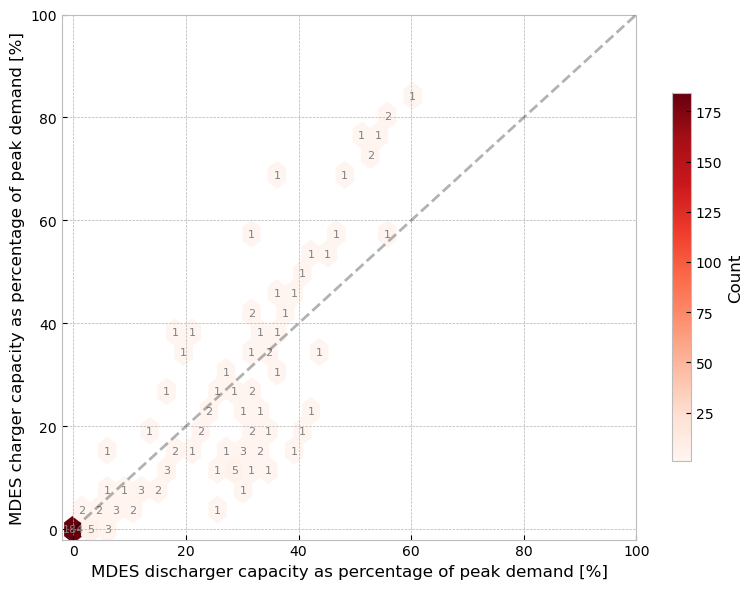

In [17]:
x = df_normalized['mdes-discharger']
y = df_normalized['mdes-charger']

plt.figure(figsize=(8, 6))
hb = plt.hexbin(x, y, gridsize=20, cmap='Reds', mincnt=1)
# Get the count and position of the hexagon
counts = hb.get_array()
verts = hb.get_offsets()

# Add counts to each hexagon
for offc, count in zip(verts, counts):
    x, y = offc
    if count > 0:
        plt.text(x, y, str(int(count)), ha='center', va='center', fontsize=8, color="grey")

cb=plt.colorbar(hb, shrink=0.7)
cb.set_label("Count", loc="center")
plt.gca().set_facecolor('white')
plt.ylim(-2, 100)
plt.xlim(-2, 100)
plt.plot([0, 100], [0, 100], 'k--', alpha=0.3, zorder=50)
plt.xlabel('MDES discharger capacity as percentage of peak demand [%]', fontsize=12)
plt.ylabel('MDES charger capacity as percentage of peak demand [%]', fontsize=12)
plt.tight_layout()
plt.savefig("Supplementary Figure 1.pdf", dpi=750)
plt.show()

**Supplementary figures for storage duration ranges**

In [18]:
capacities = pd.read_csv("nodal_capacities.csv",  index_col=2, header = 2)
efficiency = pd.read_csv("efficiency_MDES.csv", index_col=0, header=2)

In [19]:
sto_cap =capacities[(capacities['opt'] == "stores") | (capacities['opt'] == "links")].dropna()

In [20]:
sto_cap.rename(columns={'Unnamed: 1': 'region'}, inplace=True)
sto_cap.drop("opt",axis=1, inplace=True)

1. storage durations for hydrogen and battery

In [21]:
store_H2 = sto_cap[sto_cap.index == "H2"].set_index("region")
discharge_H2 = sto_cap[sto_cap.index == "H2 fuel cell"].set_index("region")
store_battery = sto_cap[sto_cap.index == "battery"].set_index("region")
discharge_battery = sto_cap[sto_cap.index == "battery discharger"].set_index("region")

In [22]:
discharge_H2.describe().mean()[discharge_H2.describe().mean()>100].sort_values()

Co2L0-2H-EQ0.8c-MDES+c5-mdes+c3-mdes+e0.6       532.889692
Co2L0-2H-EQ0.8c-MDES+c1-mdes+c11-mdes+e0.3      747.938305
Co2L0-2H-EQ0.8c-MDES+c5-mdes+c1-mdes+e0.5       824.940929
Co2L0-2H-EQ0.8c-MDES+c5-mdes+c9-mdes+e0.8      1532.131587
Co2L0-2H-EQ0.8c-MDES+c1-mdes+c13-mdes+e0.3     1543.954345
                                                  ...     
Co2L0-2H-EQ0.8c-MDES+c25-mdes+c9-mdes+e0.7     8555.076093
Co2L0-2H-EQ0.8c-MDES+c25-mdes+c11-mdes+e0.8    8573.902689
Co2L0-2H-EQ0.8c-MDES+c50-mdes+c1-mdes+e0.7     8650.917998
Co2L0-2H-EQ0.8c-MDES+c5-mdes+c11-mdes+e0.3     8697.928763
Co2L0-2H-EQ0.8c-MDES+c50-mdes+c1-mdes+e0.8     8906.185822
Length: 235, dtype: float64

In [23]:
n5_11.links.groupby("carrier").efficiency.mean()

carrier
DC                    1.000000
H2 electrolysis       0.750000
H2 fuel cell          0.500000
battery charger       0.979796
battery discharger    0.979796
mdes-charger          0.836660
mdes-discharger       0.836660
Name: efficiency, dtype: float64

In [24]:
# EP_ratios for hydrogen calculation

threshold_H2 = 1000 # MW
ratio_H2 = np.where(discharge_H2 >= threshold_H2, store_H2 / discharge_H2, 0)

# converted into dataframe
EP_ratios_H2 = pd.DataFrame(ratio_H2, index=store_H2.index, columns=store_H2.columns)

In [25]:
# EP_ratios for battery calculation

threshold_battery = 2 #MW
ratio_battery = np.where(discharge_battery >= threshold_battery, store_battery / discharge_battery, 0)

# converted into dataframe
EP_ratios_battery = pd.DataFrame(ratio_battery, index=store_battery.index, columns=store_battery.columns)

In [26]:
duration_H2 = EP_ratios_H2*0.500000
duration_battery = EP_ratios_battery*0.979796

In [27]:
H2 = duration_H2.values.flatten()[duration_H2.values.flatten()>0]
battery = duration_battery.values.flatten()[duration_battery.values.flatten()>0]

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



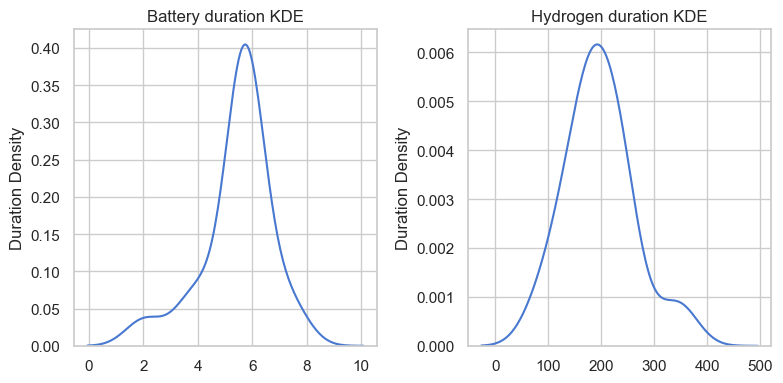

In [28]:
sns.set(style="whitegrid", palette="muted")
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
sns.kdeplot(battery, bw_method=0.55, legend=True, label="Battery", ax=ax1)
ax1.set_title("Battery duration KDE", fontsize=12)
ax1.set_ylabel("Duration Density", fontsize=12)
ax2 = fig.add_subplot(122)
sns.kdeplot(H2, bw_method=0.55, legend=True, label="H2", ax=ax2)
ax2.set_title("Hydrogen duration KDE", fontsize=12)
ax2.set_ylabel("Duration Density", fontsize=12)
plt.tight_layout()
plt.savefig("KDE for battery and hydrogen.pdf",bbox_inches='tight')
plt.show()

2. Storage duration for MDES

In [29]:
store_MDES = sto_cap[sto_cap.index == "MDES"].set_index("region")
discharge_MDES = sto_cap[sto_cap.index == "mdes-discharger"].set_index("region")

In [30]:
# EP_ratios calculation

threshold = 50 #MW
ratio = np.where(discharge_MDES >= threshold, store_MDES / discharge_MDES, 0)

# converted into dataframe
EP_ratios = pd.DataFrame(ratio, index=store_MDES.index, columns=store_MDES.columns)

In [31]:
EP_ratios.head()

,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c5-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c7-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c9-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c11-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c13-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c15-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.5,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.5,...,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c13-mdes+e0.7,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c15-mdes+e0.7,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c1-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c3-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c5-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c7-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c9-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c11-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c13-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c15-mdes+e0.8
region,,,,,,,,,,,,,,,,,,,,,
AL1 0,644.798680,737.193173,743.990904,0.00000,0.000000,0.000000,0.000000,0.000000,497.003228,692.962900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT1 0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BA1 0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,146.187073,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BE1 0,274.493109,332.453557,378.779158,362.21351,390.087246,372.631707,348.338857,354.976835,147.967598,596.601771,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BG1 0,566.914045,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,270.038433,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
duration_MDES = EP_ratios*efficiency

In [33]:
MDES = duration_MDES.values.flatten()[duration_MDES.values.flatten()>0]

In [34]:
time = duration_MDES.replace(0, np.nan)
time

,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c5-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c7-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c9-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c11-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c13-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c15-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.5,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.5,...,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c13-mdes+e0.7,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c15-mdes+e0.7,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c1-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c3-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c5-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c7-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c9-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c11-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c13-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c15-mdes+e0.8
region,,,,,,,,,,,,,,,,,,,,,
AL1 0,353.170782,403.777330,407.500601,NaN,NaN,NaN,NaN,NaN,351.434353,489.998766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT1 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BA1 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.369870,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BE1 0,150.346068,182.092313,207.465889,198.392510,213.659584,204.098792,190.793050,194.428820,104.628892,421.861158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BG1 0,310.511610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.946007,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH1 0,59.481211,112.134224,126.759749,150.479211,161.848377,164.815321,149.758562,174.155265,83.550280,118.932337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CZ1 0,46.187736,79.409124,79.429229,87.408939,98.946564,103.083958,108.972309,125.364304,70.531896,119.506744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DE1 0,190.077050,227.628586,218.999205,224.844353,221.212940,202.237250,172.121296,162.803753,234.682445,289.366959,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DK1 0,104.495770,174.744497,170.454209,162.972297,173.705976,223.915655,242.320025,214.829640,124.318104,167.452019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
time = time.mean(axis=0)

In [36]:
time.dropna(inplace=True)

In [37]:
time.rename("Duration (h)", inplace=True)
time = time.to_frame()

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



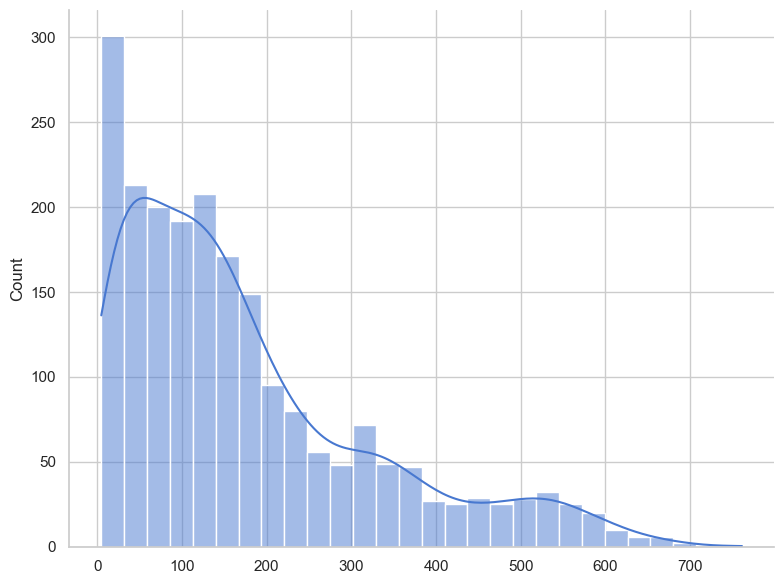

In [38]:
sns.displot(data=MDES, kde=True, height=6, aspect=8/6)
plt.show()

In [39]:
scatter_MDES=pd.DataFrame()
for i in np.arange(280):
    opt=duration_MDES.columns
    df=duration_MDES.iloc[:,i].to_frame()
    df['opts']=[opt[i]]*len(df)
    pattern_MDES = r'MDES\+c(\d+)'
    pattern_mdes = r'mdes\+c(\d+)'
    pattern_mdes_e = r'mdes\+e([0-9.]+)'
    df['Energy capacity cost'] = df.opts.apply(lambda x: int(re.search(pattern_MDES, x).group(1)) if re.search(pattern_MDES, x) else None)
    df['Power capacity cost'] = df.opts.apply(lambda x: int(re.search(pattern_mdes, x).group(1))*100 if re.search(pattern_mdes, x) else None)
    df['Round-trip efficiency'] = df.opts.apply(lambda x: int(float(re.search(pattern_mdes_e, x).group(1))*100) if re.search(pattern_mdes_e, x) else None)
    df.drop("opts",axis='columns', inplace=True)
    df.rename(columns={opt[i]:'duration [h]'}, inplace=True)
    scatter_MDES = pd.concat([scatter_MDES, df], axis=0)

In [40]:
p100 = scatter_MDES[scatter_MDES["Power capacity cost"]==100]
p100 = p100[p100['duration [h]']>0]
p300 = scatter_MDES[scatter_MDES["Power capacity cost"]==300]
p300 = p300[p300['duration [h]']>0]
p500 = scatter_MDES[scatter_MDES["Power capacity cost"]==500]
p500 = p500[p500['duration [h]']>0]
p700 = scatter_MDES[scatter_MDES["Power capacity cost"]==700]
p700 = p700[p700['duration [h]']>0]
p900 = scatter_MDES[scatter_MDES["Power capacity cost"]==900]
p900 = p900[p900['duration [h]']>0]
p1100 = scatter_MDES[scatter_MDES["Power capacity cost"]==1100]
p1100 = p1100[p1100['duration [h]']>0]
p1300 = scatter_MDES[scatter_MDES["Power capacity cost"]==1300]
p1300 = p1300[p1300['duration [h]']>0]
p1500 = scatter_MDES[scatter_MDES["Power capacity cost"]==1500]
p1500 = p1500[p1500['duration [h]']>0]

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_ca

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_ca

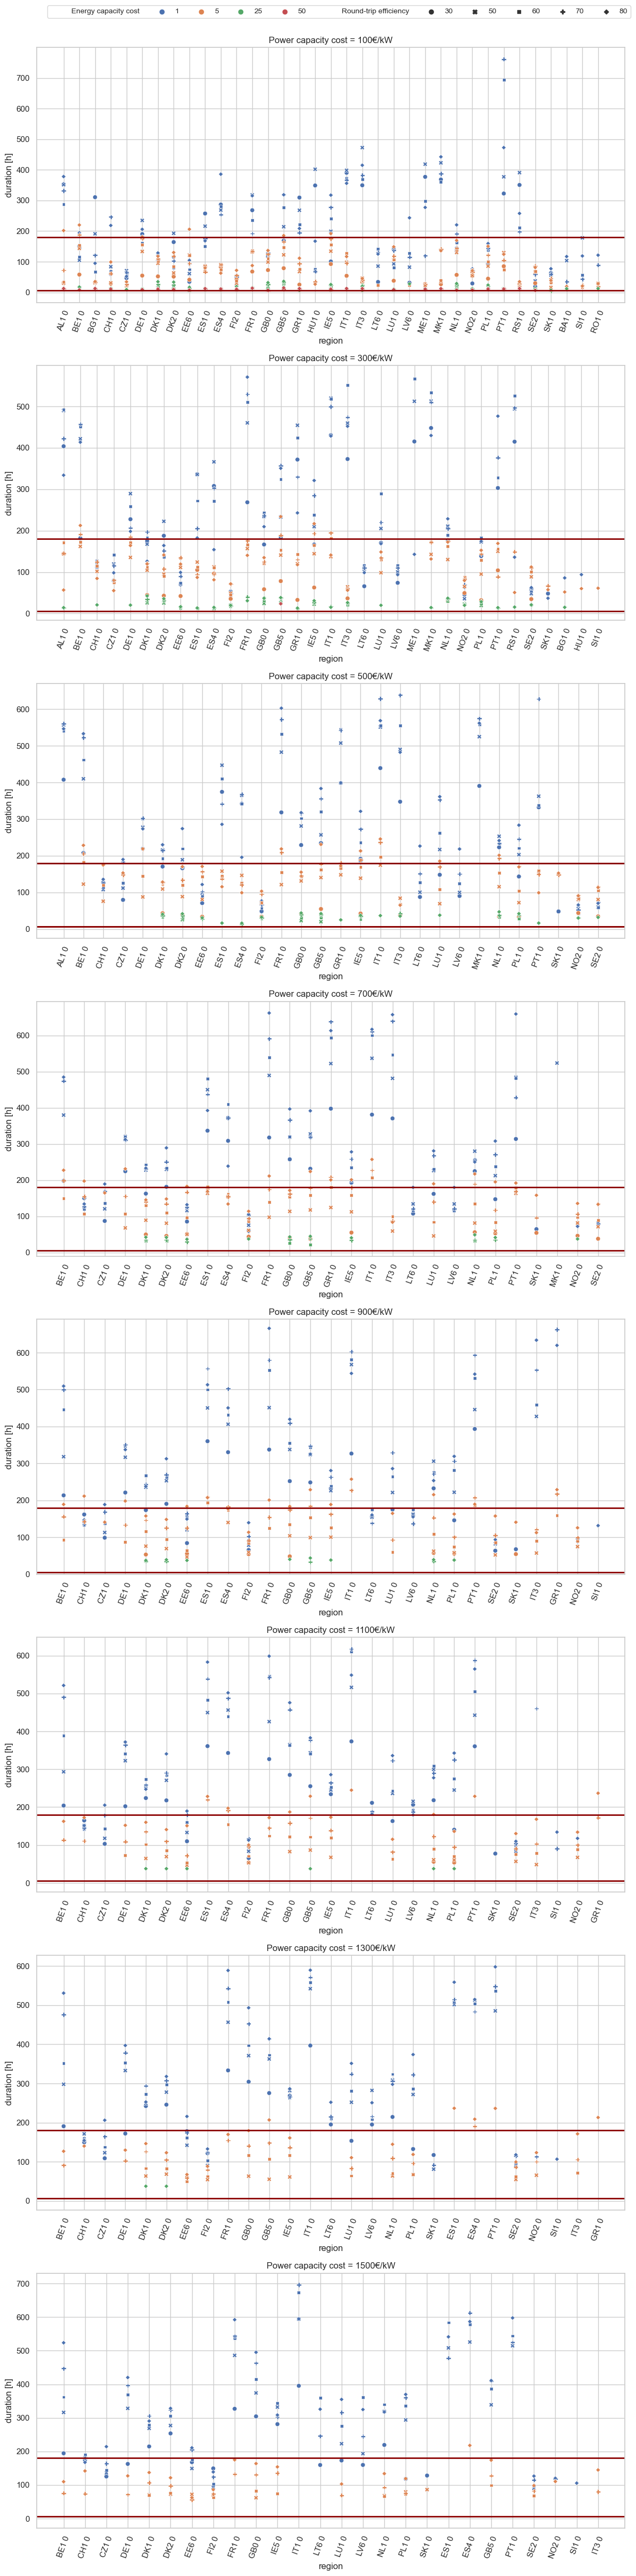

In [41]:
fig, axs = plt.subplots(8, 1, figsize=(12,48))

# the first subplot
sns.scatterplot(x='region', y='duration [h]', hue='Energy capacity cost', data=p100, 
                palette="deep", style='Round-trip efficiency', ax=axs[0])
axs[0].axhline(y=6, ls="-", c="darkred", linewidth=2)
axs[0].axhline(y=180, ls="-", c="darkred", linewidth=2)
axs[0].tick_params(axis='x', rotation=70)
axs[0].set_title("Power capacity cost = 100€/kW")

# the second subplot
sns.scatterplot(x='region', y='duration [h]', hue='Energy capacity cost', data=p300, 
                palette="deep", style='Round-trip efficiency', ax=axs[1])
axs[1].axhline(y=6, ls="-", c="darkred", linewidth=2)
axs[1].axhline(y=180, ls="-", c="darkred", linewidth=2)
axs[1].tick_params(axis='x', rotation=70)
axs[1].set_title("Power capacity cost = 300€/kW")

# the third subplot
sns.scatterplot(x='region', y='duration [h]', hue='Energy capacity cost', data=p500, 
                palette="deep", style='Round-trip efficiency', ax=axs[2])
axs[2].axhline(y=6, ls="-", c="darkred", linewidth=2)
axs[2].axhline(y=180, ls="-", c="darkred", linewidth=2)
axs[2].tick_params(axis='x', rotation=70)
axs[2].set_title("Power capacity cost = 500€/kW")

# the third subplot
sns.scatterplot(x='region', y='duration [h]', hue='Energy capacity cost', data=p500, 
                palette="deep", style='Round-trip efficiency', ax=axs[2])
axs[2].axhline(y=6, ls="-", c="darkred", linewidth=2)
axs[2].axhline(y=180, ls="-", c="darkred", linewidth=2)
axs[2].tick_params(axis='x', rotation=70)
axs[2].set_title("Power capacity cost = 500€/kW")

# the fourth subplot
sns.scatterplot(x='region', y='duration [h]', hue='Energy capacity cost', data=p700, 
                palette="deep", style='Round-trip efficiency', ax=axs[3])
axs[3].axhline(y=6, ls="-", c="darkred", linewidth=2)
axs[3].axhline(y=180, ls="-", c="darkred", linewidth=2)
axs[3].tick_params(axis='x', rotation=70)
axs[3].set_title("Power capacity cost = 700€/kW")

# the fifthsubplot
sns.scatterplot(x='region', y='duration [h]', hue='Energy capacity cost', data=p900, 
                palette="deep", style='Round-trip efficiency', ax=axs[4])
axs[4].axhline(y=6, ls="-", c="darkred", linewidth=2)
axs[4].axhline(y=180, ls="-", c="darkred", linewidth=2)
axs[4].tick_params(axis='x', rotation=70)
axs[4].set_ylim(0,690)
axs[4].set_title("Power capacity cost = 900€/kW")

# the sixth subplot
sns.scatterplot(x='region', y='duration [h]', hue='Energy capacity cost', data=p1100, 
                palette="deep", style='Round-trip efficiency', ax=axs[5])
axs[5].axhline(y=6, ls="-", c="darkred", linewidth=2)
axs[5].axhline(y=180, ls="-", c="darkred", linewidth=2)
axs[5].tick_params(axis='x', rotation=70)
axs[5].set_title("Power capacity cost = 1100€/kW")

# the sixth subplot
sns.scatterplot(x='region', y='duration [h]', hue='Energy capacity cost', data=p1300, 
                palette="deep", style='Round-trip efficiency', ax=axs[6])
axs[6].axhline(y=6, ls="-", c="darkred", linewidth=2)
axs[6].axhline(y=180, ls="-", c="darkred", linewidth=2)
axs[6].tick_params(axis='x', rotation=70)
axs[6].set_title("Power capacity cost = 1300€/kW")

# the seventh subplot
sns.scatterplot(x='region', y='duration [h]', hue='Energy capacity cost', data=p1500, 
                palette="deep", style='Round-trip efficiency', ax=axs[7])
axs[7].axhline(y=6, ls="-", c="darkred", linewidth=2)
axs[7].axhline(y=180, ls="-", c="darkred", linewidth=2)
axs[7].tick_params(axis='x', rotation=70)
axs[7].set_title("Power capacity cost = 1500€/kW")


# remove the legend of subplots
axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].get_legend().remove()
axs[3].get_legend().remove()
axs[4].get_legend().remove()
axs[5].get_legend().remove()
axs[6].get_legend().remove()
axs[7].get_legend().remove()

# create handles and labels for the whole figure
handles, labels = axs[0].get_legend_handles_labels()


fig.legend(handles, labels, bbox_to_anchor=(1, 1.01), ncol=11, fontsize=10, labelspacing=0.5,frameon=True) 

plt.tight_layout()
plt.savefig("Regional storage duration of MDES across all cases with marker style.png", dpi=750, bbox_inches='tight')
plt.show()


**Operation and Storage filling levels for three types of storages**

In [42]:
n50 = pypsa.Network("capacity/elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c50-mdes+c1-mdes+e0.8.nc")

INFO:pypsa.io:Imported network elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c50-mdes+c1-mdes+e0.8.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [43]:
soc = n50.stores_t.e.groupby(n50.stores.carrier, axis=1).sum()

C:\Users\Joanna\AppData\Local\Temp\ipykernel_26940\2588276318.py:1: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



In [44]:
soc

carrier,H2,MDES,battery
snapshot,,,
2013-01-01 00:00:00,7.488694e+07,428075.726056,47335.570451
2013-01-01 02:00:00,7.502368e+07,438757.224450,46540.837794
2013-01-01 04:00:00,7.516304e+07,429502.934136,35664.031270
2013-01-01 06:00:00,7.530654e+07,427363.530499,23211.359100
2013-01-01 08:00:00,7.545041e+07,628578.447577,134968.637309
...,...,...,...
2013-12-31 14:00:00,7.425817e+07,770209.656809,356116.907722
2013-12-31 16:00:00,7.436053e+07,674619.535557,253488.877191
2013-12-31 18:00:00,7.448015e+07,578241.274433,174292.928940


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
soc_normalized = scaler.fit_transform(soc)

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is

In [46]:
normalized_d = pd.DataFrame(soc_normalized*100, columns=soc.columns, index=soc.index)
normalized_d

carrier,H2,MDES,battery
snapshot,,,
2013-01-01 00:00:00,93.859573,34.527425,12.277756
2013-01-01 02:00:00,94.031019,35.392250,12.071605
2013-01-01 04:00:00,94.205749,34.642979,9.250191
2013-01-01 06:00:00,94.385668,34.469762,6.020002
2013-01-01 08:00:00,94.566056,50.761075,35.009536
...,...,...,...
2013-12-31 14:00:00,93.071230,62.228208,92.374796
2013-12-31 16:00:00,93.199566,54.488779,65.753364
2013-12-31 18:00:00,93.349543,46.685539,45.210150


In [47]:
H2 = normalized_d.H2.to_frame()
MDES = normalized_d.MDES.to_frame()
battery = normalized_d.battery.to_frame()

In [48]:
H2['hour of day'] = H2.index.hour
H2['day of year'] = H2.index.date
MDES['hour of day'] = MDES.index.hour
MDES['day of year'] = MDES.index.date
battery['hour of day'] = battery.index.hour
battery['day of year'] = battery.index.date

In [49]:
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

In [50]:
pivot_H2 = H2.pivot(index='hour of day', columns='day of year', values='H2')
pivot_MDES = MDES.pivot(index='hour of day', columns='day of year', values='MDES')
pivot_battery = battery.pivot(index='hour of day', columns='day of year', values='battery')

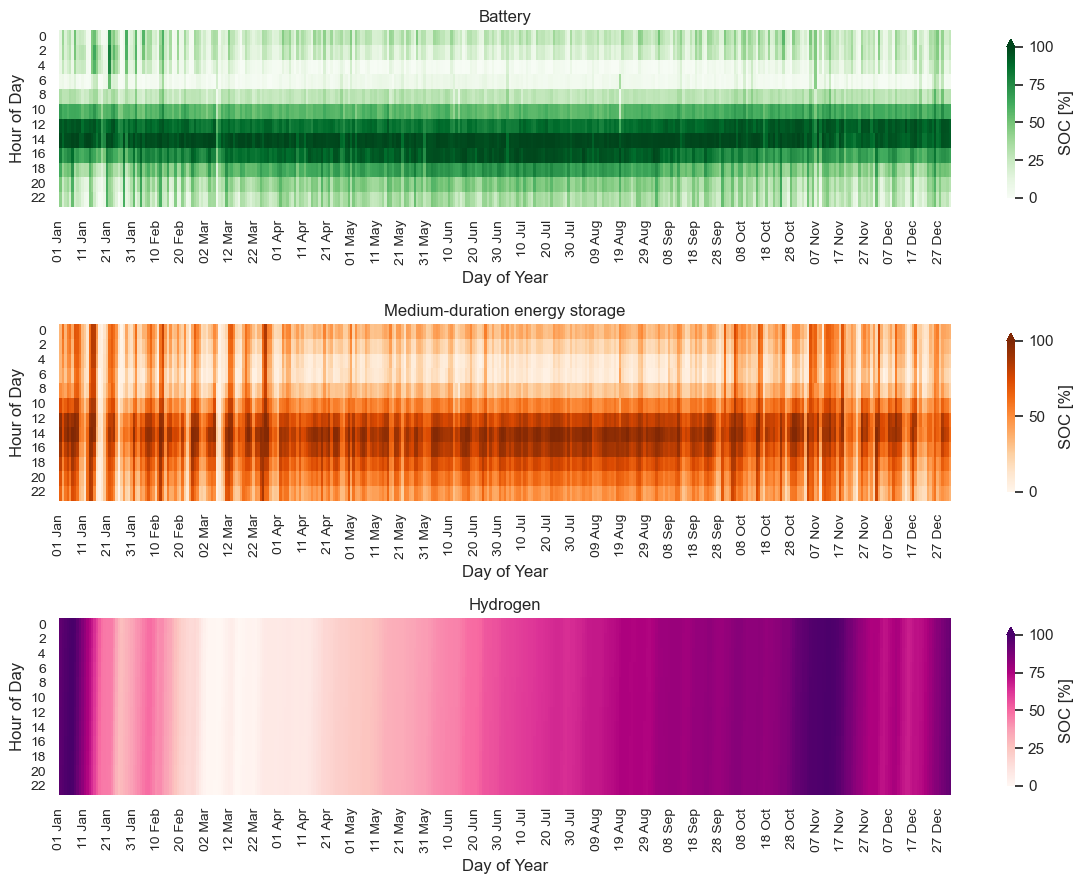

In [51]:
fig, axs = plt.subplots(3, 1, figsize=(12, 9))

# create first subplot for battery
sns.heatmap(pivot_battery, cmap='Greens', cbar=True, cbar_kws={"label": "SOC [%]", "shrink": 0.9, "extend": "max"}, ax=axs[0])
axs[0].set_title('Battery', fontsize=12)
axs[0].set_xlabel('Day of Year', fontsize=12)
axs[0].set_ylabel('Hour of Day', fontsize=12)
axs[0].tick_params(axis='x', labelsize=10)
axs[0].tick_params(axis='y', labelsize=10)
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
axs[0].xaxis.set_major_locator(MultipleLocator(base=10))
axs[0].grid(False)

# create second subplot for MDES
sns.heatmap(pivot_MDES, cmap='Oranges', cbar=True, cbar_kws={"label": "SOC [%]", "shrink": 0.9, "extend": "max"}, ax=axs[1])
axs[1].set_title('Medium-duration energy storage', fontsize=12)
axs[1].set_xlabel('Day of Year', fontsize=12)
axs[1].set_ylabel('Hour of Day', fontsize=12)
axs[1].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='y', labelsize=10)
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
axs[1].xaxis.set_major_locator(MultipleLocator(base=10))
axs[1].grid(False)

# create third subplot for H2
sns.heatmap(pivot_H2, cmap='RdPu', cbar=True, cbar_kws={"label": "SOC [%]", "shrink": 0.9, "extend": "max"}, ax=axs[2])
axs[2].set_title('Hydrogen', fontsize=12)
axs[2].set_xlabel('Day of Year', fontsize=12)
axs[2].set_ylabel('Hour of Day', fontsize=12)
axs[2].tick_params(axis='x', labelsize=10)
axs[2].tick_params(axis='y', labelsize=10)
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
axs[2].xaxis.set_major_locator(MultipleLocator(base=10))
axs[2].grid(False)

plt.tight_layout()
plt.savefig("Suuplementary 3 operations and storage filling levels.pdf")
plt.show()